# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2018-2019 учебный год

Лектор: Илья Щуров

Семинаристы: Евгения Ческидова, Евгений Ковалев

Ассистенты: Константин Ваниев, Софья Дымченко

# Что сегодня узнаем

1. Что такое градиентный спуск и как он работает
2. Как обучить линейную регрессию с помощью градиентного спуска
3. Что такое коэффициент детерминации
4. Как линейная зависимость признаков влияет на построение линейной регрессии

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import norm
%matplotlib inline

## Линейная регрессия: напоминание

В задаче линейной регрессии мы предполагаем, что ответ является линейной функцией от данных, то есть

$$y = w_1 x_1 + \ldots + w_m x_m = \langle x, w\rangle,$$

* Здесь $\langle\cdot, \cdot\rangle$ — скалярное произведение.
* $w_i$ — вес i-ого признака в модели линейной регрессии. 
    * $w=(w_1, \ldots, w_m)$ — вектор весов признаков.
* $x_i$ — значение i-ого признака во входном $x$ 

Распространенным способом обучения линейной регрессионной модели является метод наименьших квадратов. При использовании этого метода минимизируется *квадратичная функция потерь*:

$$Q(w) = \sum_{j=1}^n Q_j(w) = \sum_{j=1}^n ( \langle x^j, w\rangle - y^j)^2$$

Здесь $n$ — число элементов в обучающей выборке.

На лекции мы нашли явную формулу для вектора весов, решающую минимизационную задачу:

$$w = (X^T X)^{-1} X^T y,$$

где $X$ — матрица объект-признак (по строкам объекты, по столбцам признаки), $y$ — вектор правильных ответов.

Эта формула очень полезна для теоретического анализа, но имеет некоторые ограничения:

1. В ней используется «дорогая» операция — обращение матрицы размером $d\times d$, где $d$ — количество признаков. Она занимает $O(d^3)$ операций, и если $d$ большое, может быть довольно медленной.
2. Эта формула выведена в предположении именно квадратичной функции потерь. Если мы захотим использовать другую формулу потерь, она не работает (и не всегда можно вывести такую явную формулу, которая бы работала). 

Вместо использования явной формулы можно предложить другой подход — минимизация $Q$ с помощью итеративных методов. Простейшим из них является метод градиентного спуска. 

# Градиентный спуск

Рассмотрим функцию $f(x, y)=x^2 + 10 y^2$. Её градиент равен $\nabla f(x, y)=\frac{\partial f(x, y)}{\partial(x, y)}=(2x, 20y)$. Он показывает направление наискорейшего роста функции, то есть отвечает на вопрос «куда нам идти, если мы находимся в точке $(x, y)$ и хотим увеличивать значение функции как можно быстрее». Чтобы уменьшать значение функции, нужно идти в противоположном направлении. В связи с этим, напрашивается такой алгоритм нахождения минимума функции $f$:

1. Возьмём любую точку $(x_0, y_0)$. Посчитаем градиент в этой точке.

2. Для каждого $i=1, \ldots$, положим: $(x_{i+1}, y_{i+1})=(x_i, y_i) - \eta \nabla f(x_i, y_i)$, где $\eta$ — какое-то число (небольшое).

3. Будем продолжать вычислять очередную точку $(x_i, y_i)$ до тех пор, пока мы не окажемся достаточно близко к минимуму — например, до тех пор, пока градиент не слишком маленький.

In [2]:
def f(u):
    return u[0] ** 2 + 10 * u[1] ** 2
def Df(u):
    return np.array([2*u[0], 20 * u[1]])

In [3]:
def gradient_descent_simple(f, Df, eta=0.01, steps=20000, initial_point=(-3, 3), 
                            precision=1e-10, xmin=-4, xmax=4, ymin=-3, 
                            ymax=3, allpoints=False):
    u_prev = np.array(initial_point)


    X = np.linspace(xmin, xmax, 100)
    Y = np.linspace(ymin, ymax, 100)
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, [[f(np.array([x, y])) for x in X] for y in Y], 100)
    # нарисуем линии уровня функции $f$

    points = []
    for i in range(steps):
        points.append(u_prev)
        u_new = u_prev - eta * Df(u_prev)

        if norm(u_new - u_prev) < precision:
            break
        # прекратить, если новая точка достаточно близка к старой

        u_prev = u_new


    plt.plot([p[0] for p in points], [p[1] for p in points], 'o-')
    if allpoints:
        return points
    return points[-1]

array([-4.94792403e-09,  2.95255661e-97])

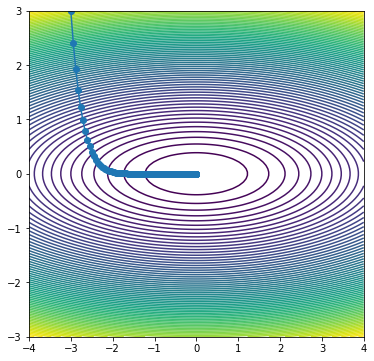

In [4]:
gradient_descent_simple(f=f, Df=Df)

Если взять слишком большую $\eta$, сходимости может и не быть:

array([-1.e-323, -3.e+000])

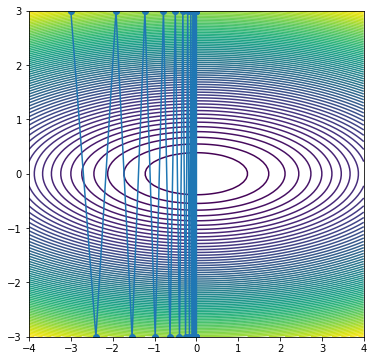

In [5]:
gradient_descent_simple(f=f, Df=Df, eta=0.1)

А если $\eta$ слишком маленькая, то мы можем не дойти до минимума.

array([-2.99988001,  2.9988003 ])

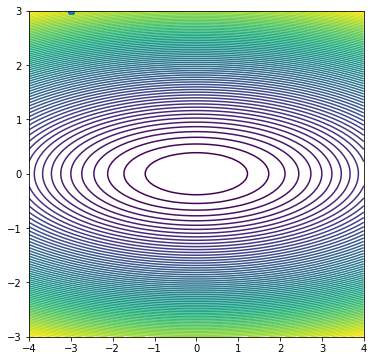

In [6]:
gradient_descent_simple(f=f, Df=Df, eta=1e-9)

Рассмотрим функцию посложнее — возьмём так называемую [функцию Розенброка](https://ru.wikipedia.org/wiki/Функция_Розенброка).

In [7]:
def rosenbrock(u):
    return ((1 - u[0]) ** 2
            + 100 * (u[1] - u[0] ** 2) ** 2)
def Drosenbrock(u):
    return (np.array([-2 * (1 - u[0]) 
                      - 100 * 2 * (u[1] - u[0] ** 2) * 2 * u[0], 
                      100 * 2 * (u[1] - u[0] ** 2)]))

array([-0.40888058,  0.17412667])

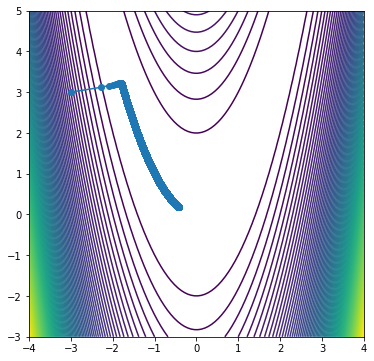

In [8]:
gradient_descent_simple(f=rosenbrock, Df=Drosenbrock,
                        initial_point=(-3, 3), 
                        eta=0.0001, ymax=5)

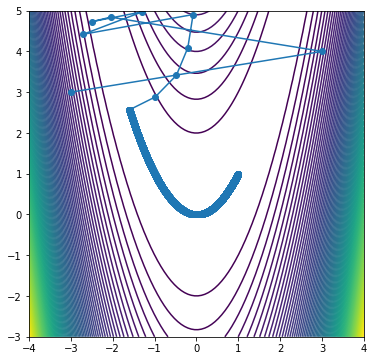

In [9]:
points = gradient_descent_simple(f=rosenbrock, Df=Drosenbrock, 
                                 initial_point=(-3, 3), eta=0.001 / 1.2, 
                                 ymax=5, allpoints=True)

## Градиентный спуск своими руками

Предлагается найти градиент квадратичной функции потерь и реализовать градиентный спуск для модельной задачи.

Пусть идеальная зависимость задается следующим образом: $y = kx + b$

Пусть 
* k=2
* b=3


Добавим к данным немного шума из нормального распределения и постараемся восстановить параметры $w = (k, b)$

Для этого нам необходимо знать градиент для квадратичной функции потерь.

Давайте распишем градиент для одномерного случая. Вывод в общем виде можно посмотреть в конспекте лекции (когда Илья его напишет).

In [10]:
# сгенерируем выборку:
from numpy.random import normal

n = 100

# сгенерировали n примеров x из нормального распределения
x = normal(size=n)

# генерируем зависимость с добавлением шума
y = 2 * x + 3 + normal(size=n)

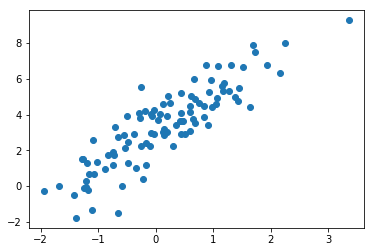

In [11]:
# посмотрим, что у нас за данные
plt.plot(x, y, 'o')
plt.show()

**Добавление свободного члена**

Поскольку наша регрессия имеет свободный член, к матрице $X$ нужно приписать столбец, состоящий из одних единиц. В данном случае мы использовали функцию `np.ones_like()`, генерирующую объект с такими же измерениями, как и его аргумент, заполненный единицами. В данном случае мы попросили сделать вектор такой же длины, как $x$, но заполненный единицами. `np.array` в данном случае создаёт матрицу из списка списков, считая, что она записана по строкам; чтобы её записать по столбцам, мы применили транспонирование.

In [12]:
X = np.array([x, np.ones_like(x)]).T

In [13]:
# посмотрим теперь на первые 5 примеров
X[:5]

array([[-0.72081231,  1.        ],
       [ 0.59819826,  1.        ],
       [ 0.13176766,  1.        ],
       [ 0.43871244,  1.        ],
       [-0.65358213,  1.        ]])

Запишем квадратичную функцию потерь и её градиент.

In [14]:
def Q(w):
    S = X @ w - y
    return S.T @ S

In [15]:
def DQ(w):
    return 2 * (X.T @ X @ w - X.T @ y)

array([1.98584634, 3.09199105])

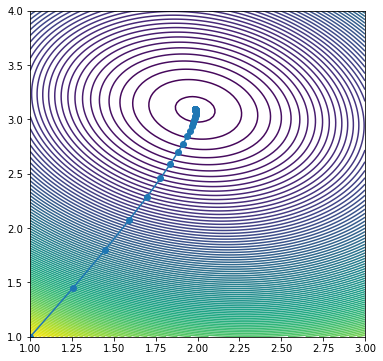

In [16]:
gradient_descent_simple(f=Q, Df=DQ, xmin=1, xmax=3, ymin=1, ymax=4, 
                        initial_point=(1, 1), eta=0.001)

Как видим, получается результат, похожий на настоящие значения $k$ и $b$.

## Линейная регрессия из коробки

Воспользуемся самым простым способом построить регрессию, используя готовые модели из sklearn. Запуская регрессию из коробки, необходимо читать, что [внутри](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [17]:
import numpy as np
import pandas as pd
#Загружаем датасет
x = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data',
                header=None, na_values='?')

#Загружаем и парсим имена признаков
### ТУТ МАГИЯ
import requests
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names')
text = r.text
import re
colnames = re.findall("@attribute ([a-zA-Z1-90]*) [a-zA-Z]*\n", text)
### ЗАКОНЧИЛАСЬ МАГИЯ

#Добавляем имена признаков
x.columns = colnames
#Создаём себе дополнительные проблемы, сортируем выборку по возрастанию целевой переменной
#x = x.sort_values(by='ViolentCrimesPerPop')
#Выкидываем лишние ненужные колонки
x = x.drop(['state','county','community','communityname','fold'],1)
#Заполняем все пропуски в данных средними значениями для каждого признака

from sklearn import preprocessing
mis_replacer = preprocessing.Imputer(strategy="mean")
x = pd.DataFrame(data=mis_replacer.fit_transform(x),columns=x.columns)
#Выделяем вектор y в отдельную переменную 
y = x['ViolentCrimesPerPop']
y = pd.DataFrame(y)
x = x.drop(['ViolentCrimesPerPop'],1)
#x = x.drop(['state','county','community','communityname','fold','ViolentCrimesPerPop','LemasSwFTPerPop'],1)
colnames = x.columns

Также мы изначально разобьем наши данные пополам и пока что будем работать только с одной половиной:

In [18]:
x_tr,y_tr = x.iloc[:int(x.shape[0]/2)], y.iloc[:int(x.shape[0]/2)]
x_test,y_test = x.iloc[int(x.shape[0]/2)+1:], y.iloc[int(x.shape[0]/2)+1:]

In [19]:
#Импортируем класс из sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#непосредсвенно строим регрессию
lr.fit(x_tr,y_tr)
#Готово!

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Сразу замечаем, что по умолчанию в число регрессоров будет включена и константа. С помощью методов класса, из нашей построенной регрессии можно получить вектор весов $w$:

In [20]:
w = lr.coef_[0]
w = pd.DataFrame({'Имя признака':colnames,'Вес признака':w},
                 columns=['Имя признака','Вес признака'])
w[:10]

,Имя признака,Вес признака
0,population,0.528710
1,householdsize,-0.023414
2,racepctblack,0.259298
3,racePctWhite,-0.114290
4,racePctAsian,-0.032401
5,racePctHisp,0.071622
6,agePct12t21,0.006643
7,agePct12t29,-0.583894
8,agePct16t24,0.106691
9,agePct65up,-0.153170


Построим прогноз $a$ на основе нашей модели:

In [21]:
a = lr.predict(x_tr)
a = pd.DataFrame(a, columns=['prediction'])
# прогноз для первых нескольких объектов
a.head()

,prediction
0,0.206654
1,0.269462
2,0.336284
3,0.378937
4,-0.021606


## $R^2$ - основная метрика качества регрессии

Когда необходимо сравнить по качеству две разных линейных модели, то чаще всего для этого используют метрику $R^2$. Основное преимущество данной метрики: её значение может интерпретироваться. $R^2$ - это с некоторыми оговорками доля дисперсии, объяснённая моделью в общей дисперсии целевой переменной. Данный показатель принимает значения в диапазоне от 0 до 1. Чем он больше, тем лучше построенная модель предсказывает поведение целевой переменной.  

$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2} \approx 1 - \frac{\text{Var} (Y|X)}{\text{Var} Y}$$

Теперь посчитаем $R^2$ для построенной нами регрессии:

In [22]:
#первый способ
print('Первый способ: %f' %lr.score(x_tr,y_tr))
#второй способ
import sklearn.metrics as metrics
print('Второй способ: %f' %metrics.r2_score(y_tr,a))

Первый способ: 0.706457
Второй способ: 0.706457


70% объяснённой дисперсии целевой переменной. Много это или мало — зависит от конкретной задачи и от наших субъективных ожиданий.  Если в структуре наших данных почти нет закономерностей и всё подвержено случайным событиям, то ни одна модель не сможет дать нам высокий $R^2$. В таком случае и 15% было бы неплохим результатом.

## Валидация - проверка обобщающей способности


$R^2$, который приведён выше, посчитан на тех данных, на которых была построена регрессия. Но мы хотим, чтобы построенная модель успешно справлялась с прогнозами и на тех на данных, для которых ей неизвестно истинное значение целевой переменной, иначе практическая польза такой модели будет мала. Если модель способна выявить в данных какие-либо закономерности и обобщить их для данных, которые не использовались при её построении, то мы говорим, что она обладает обобщающей способностью. Проверку обобщающей способности мы назовём валидацией. В конечном счёте, нас интересует $R^2$, который модель покажет на новых данных.

Вспомним об отложенной нами выборке и воспользуемся ей для проверки обобщающей способности.

In [23]:
a_test = lr.predict(x_test)
print('R2 на тестовой выборке: %f' %metrics.r2_score(y_test,a_test))

R2 на тестовой выборке: -27.279311


### Подводные камни

Oops... something went wrong...: $R^2$ оказался отрицательным. Как это произошло? Обратим внимание на дробь:

$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2} \approx 1 - \frac{\text{Var} (Y|X)}{\text{Var} Y}$$

В ней дисперсия целевой переменной при нашей модели сравнивается с обычной дисперсией. Обычную дисперсию можно представить как условную дисперсию целевой переменной в *"базовой"* модели, которая рисует горизонтальную прямую на уровне $\bar{y}$. Выходит, что для регрессий, которые справляются с предсказанием хуже, чем базовая регрессия, зашитая прямо в формулу данной метрики, $R^2$ выдает отрицательный результат:
![pictcha](https://raw.githubusercontent.com/FilatovArtm/ML_Eco-NES_2017/master/seminars/maintain/sem3picture.png)

Таким образом, мы, решив провести валидацию, сразу поняли, что на новой выборке наша модель хуже, чем отсутствие модели вообще (прогноз $a(.)=\bar{y}$ не требует $x$ для построения). Поэтому обобщающая способность нашей модели равна нулю. К счастью, проблему можно решить. Посмотрим на вектор $w$ ещё раз, при этом отсортировав:

In [24]:
w.sort_values(by='Вес признака')[:6]

,Имя признака,Вес признака
103,PolicPerPop,-3730.453040
10,numbUrban,-0.739779
79,OwnOccLowQuart,-0.700565
7,agePct12t29,-0.583894
63,PctLargHouseOccup,-0.565176
21,whitePerCap,-0.508789


И сразу замечаем, что у 1-ого регрессора в данном списке очень маленькое значение по сравнению с другими. А если обратим внимание на дно данного списка, то заметим брата-близнеца данного регрессора, имеющего очень большое значение и по модулю равное ему! В этот момент мы понимаем в чём дело. Похоже в нашей матрице "объекты-признаки" есть линейно-зависимые регрессоры. Посмотрим на корреляцию между ними: 

In [25]:
np.corrcoef(x_tr['PolicPerPop'],x_tr['LemasSwFTPerPop'])[0,1]

0.9999999850478895

Корреляция близка к единице. Следовательно, в наших данных два почти одинаковых регрессора.

Что будет, если включить в модель линейно-зависимые признаки? Приведем пример. Пусть мы имеем дело с *истинной зависимостью*:

$$y_i=7+2p_i+3q_i+4r_i,$$

где истинный вектор весов имеет вид $w=(w_0,w_1,w_2,w_3)^T=(7,2,3,4)$. Пусть переменные $q_i$ и $r_i$ всегда одинаковы:

$$q_i=r_i$$ 

Тогда существует бесконечное число комбинаций $w_2$ и $w_3$, которые нам всё равно бы подошли. Например, возьмём комбинацию $w*=(7,2,-2000,2007)$:

$$7+2p_i-2000q_i+2007r_i\\7+2p_i-2000q_i+2007q_i\\7+2p_i+7q_i\\7+2p_i+3q_i+4q_i\\7+2p_i+3q_i+4r_i=y_i$$

Поэтому нам всё равно, какой вектор из бесконечного числа комбинаций взять. И обычно компьютер выбирает тот, в котором веса очень большие. А это означает, что если в новой выборке найдутся объекты, у которых данные регрессоры будут отличаться чуть больше, чем в обучающей выборке, то это будет катастрофически влиять на значение $y$ у таких объектов, далеко отбрасывая их даже от $\bar{y}$. В эконометрике данное явление называется мультиколлинеарностью, и мы рассмотрели его лишь с одной стороны.  

__Решение проблемы:__ Мы посмотрели описания признаков "PolicPerPop" и "LemasSwFTPerPop" и обнаружили, что они означают почти одно и то же (число полицейских на душу населения), поэтому мы просто удалили один из признаков.

In [26]:
x = x.drop(['LemasSwFTPerPop'],1)
colnames  = x.columns

In [27]:
x_tr,y_tr = x.iloc[:int(x.shape[0]/2)],y.iloc[:int(x.shape[0]/2)]
x_test,y_test = x.iloc[int(x.shape[0]/2)+1:],y.iloc[int(x.shape[0]/2)+1:]

Построим регрессию вновь и обнаружим, что теперь она приобрела обобщающую способность:

In [28]:
lr.fit(x_tr,y_tr)
w = lr.coef_[0]
w = pd.DataFrame({'Имя признака':colnames,'Вес признака':w},columns = ['Имя признака','Вес признака'])

a = lr.predict(x_tr)
a_test = lr.predict(x_test)
print('R2 на обучающей выборке: %f' %metrics.r2_score(y_tr,a))
print('R2 на тестовой выборке: %f' %metrics.r2_score(y_test,a_test))


R2 на обучающей выборке: 0.703996
R2 на тестовой выборке: 0.616071
